# Load in Libraries 

In [21]:
import pandas as pd
import numpy as np
import sys

import time
from selenium import webdriver
import os

import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

print('Python version', sys.version)
print('Pandas version', pd.__version__)
print('Numpy version', np.__version__)

Python version 3.6.3 |Anaconda, Inc.| (default, Oct  6 2017, 12:04:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas version 0.20.3
Numpy version 1.14.0


# Fetch School Profile Info

## Read in Data

In [8]:
profiles = pd.read_csv('../../data/Chicago_Public_Schools_-_School_Profile_Information_SY1617.csv', 
                       encoding = "ISO-8859-1")

In [9]:
profiles.head()

,School_ID,Legacy_Unit_ID,Finance_ID,Short_Name,Long_Name,School_Type,Primary_Category,Is_High_School,Is_Middle_School,Is_Elementary_School,...,Third_Contact_Name,Fourth_Contact_Title,Fourth_Contact_Name,Fifth_Contact_Title,Fifth_Contact_Name,Sixth_Contact_Title,Sixth_Contact_Name,Seventh_Contact_Title,Seventh_Contact_Name,Location
0,610158,5720,29271,SAYRE,Harriet E Sayre Elementary Language Academy,Neighborhood,ES,N,Y,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1850 N NEWLAND AVE\rChicago, Illinois 60707\r(..."
1,610282,7040,26301,MCNAIR,Ronald E McNair Elementary School,Neighborhood,ES,N,Y,Y,...,Tasia White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4820 W WALTON ST\rChicago, Illinois 60651\r(41..."
2,609996,4020,23821,HOLDEN,Charles N Holden Elementary School,Neighborhood,ES,N,Y,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1104 W 31ST ST\rChicago, Illinois 60608\r(41.8..."
3,400079,3344,66395,ACERO - ZIZUMBO,Acero Charter Schools - SPC Daniel Zizumbo,Charter,ES,N,Y,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4248 W 47TH ST\rChicago, Illinois 60632\r(41.8..."
4,610089,5020,24621,MURPHY,John B Murphy Elementary School,Neighborhood,ES,N,Y,Y,...,Laura Aguirre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3539 W GRACE ST\rChicago, Illinois 60618\r(41...."


In [10]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 91 columns):
School_ID                                  661 non-null int64
Legacy_Unit_ID                             661 non-null int64
Finance_ID                                 661 non-null int64
Short_Name                                 661 non-null object
Long_Name                                  661 non-null object
School_Type                                661 non-null object
Primary_Category                           661 non-null object
Is_High_School                             661 non-null object
Is_Middle_School                           661 non-null object
Is_Elementary_School                       661 non-null object
Is_Pre_School                              661 non-null object
Summary                                    657 non-null object
Administrator_Title                        661 non-null object
Administrator                              661 non-null object
Secondary_Contac

## Subset Relevant Data

### Remove Unnecessary Rows

There are rows in here for elementary and middle schools - we don't need those. Additionally, there are some rows with no graduation rate data and we **aren't interested in the observations if there is no associated target**

In [12]:
high_schools = profiles.loc[(profiles['Is_High_School']=='Y') & (profiles['Graduation_Rate_School'].notnull())]

In [13]:
print('Rows:', len(high_schools))
high_schools.head()

Rows: 121


,School_ID,Legacy_Unit_ID,Finance_ID,Short_Name,Long_Name,School_Type,Primary_Category,Is_High_School,Is_Middle_School,Is_Elementary_School,...,Third_Contact_Name,Fourth_Contact_Title,Fourth_Contact_Name,Fifth_Contact_Title,Fifth_Contact_Name,Sixth_Contact_Title,Sixth_Contact_Name,Seventh_Contact_Title,Seventh_Contact_Name,Location
10,609764,1890,46421,JUAREZ HS,Benito Juarez Community Academy High School,Neighborhood,HS,Y,N,N,...,Nicholas Aquino,IB Coordinator,Santiago Marquez,NaN,NaN,NaN,NaN,NaN,NaN,"1450 W CERMAK RD\rChicago, Illinois 60608\r(41..."
11,400054,1931,66142,NOBLE - PRITZKER HS,Noble - Pritzker College Prep,Charter,HS,Y,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4131 W CORTLAND ST\rChicago, Illinois 60639\r(..."
12,609726,1500,47051,BROOKS HS,Gwendolyn Brooks College Preparatory Academy HS,Selective enrollment,HS,Y,Y,N,...,Daniel Bauer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"250 E 111TH ST\rChicago, Illinois 60628\r(41.6..."
14,400094,8058,63081,EPIC HS,EPIC Academy Charter High School,Charter,HS,Y,N,N,...,Tawanna Patton,Assistant Principal,Josh Miller,Director of Specialized Services,Dan Grady,Director of External Relations and Recruitment,Demetrius Amparan,Alumni Counselor,Bejeray Morrison,"8255 S HOUSTON AVE\rChicago, Illinois 60617\r(..."
21,609755,1810,47101,YOUNG HS,Whitney M Young Magnet High School,Selective enrollment,HS,Y,Y,N,...,Matthew Swanson,Assistant Principal,Melvin Soto,Assistant Principal,Lynn Zalon,NaN,NaN,NaN,NaN,"211 S LAFLIN ST\rChicago, Illinois 60607\r(41...."


### Remove Unnecessary Columns

We don't need all these columns, let's reduce our dataset to the fields we need to engineer our features

In [14]:
schools = high_schools.loc[:, ['School_ID', 
                             'Short_Name',
                             'Long_Name',
                             'School_Type',
                             'Zip',
                             'Facebook',
                             'Twitter',
                             'Student_Count_Total',
                             'Student_Count_Low_Income',
                             'School_Hours',
                             'Transportation_El',
                             'School_Latitude',
                             'School_Longitude',
                             'Average_ACT_School',
                             'Graduation_Rate_School']]

schools.head()

,School_ID,Short_Name,Long_Name,School_Type,Zip,Facebook,Twitter,Student_Count_Total,Student_Count_Low_Income,School_Hours,Transportation_El,School_Latitude,School_Longitude,Average_ACT_School,Graduation_Rate_School
10,609764,JUAREZ HS,Benito Juarez Community Academy High School,Neighborhood,60608,NaN,NaN,1739,1659,7:45 AM - 2:35 PM,"Blue, Pink, Red",41.852667,-87.663732,16.5,80.9
11,400054,NOBLE - PRITZKER HS,Noble - Pritzker College Prep,Charter,60639,https://www.facebook.com/benoblepritzker,http://twitter.com/benoblepritzker,992,936,M - R 8:05AM. - 3:50PM F 8:05- 1:30PM,"Blue, Brown",41.915214,-87.730127,21.9,90.3
12,609726,BROOKS HS,Gwendolyn Brooks College Preparatory Academy HS,Selective enrollment,60628,NaN,https://twitter.com/BrooksPrepCSL,959,692,8:00 AM - 3:30 PM,Orange,41.692763,-87.616353,22.5,93.4
14,400094,EPIC HS,EPIC Academy Charter High School,Charter,60617,https://www.facebook.com/EPICAcademyHighSchool,https://twitter.com/EPIC_Academy,523,491,8:10 AM-3:50 PM,NaN,41.744849,-87.550222,17.5,69.9
21,609755,YOUNG HS,Whitney M Young Magnet High School,Selective enrollment,60607,http://www.facebook.com/wmymhs,http://www.twitter.com/wyhs,2156,891,8:00 AM - 3:15 PM,Blue,41.878603,-87.664233,27.9,96.2


In [15]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 10 to 655
Data columns (total 15 columns):
School_ID                   121 non-null int64
Short_Name                  121 non-null object
Long_Name                   121 non-null object
School_Type                 121 non-null object
Zip                         121 non-null int64
Facebook                    65 non-null object
Twitter                     70 non-null object
Student_Count_Total         121 non-null int64
Student_Count_Low_Income    121 non-null int64
School_Hours                118 non-null object
Transportation_El           91 non-null object
School_Latitude             121 non-null float64
School_Longitude            121 non-null float64
Average_ACT_School          117 non-null float64
Graduation_Rate_School      121 non-null float64
dtypes: float64(4), int64(4), object(7)
memory usage: 15.1+ KB


In [16]:
fb_count = schools.Facebook.count()
tw_count = schools.Twitter.count()
el_count = schools.Transportation_El.count()


print('Rate w/ Facebook Link:', round(fb_count/len(schools), 2))
print('Rate w/ Twitter Link:', round(tw_count/len(schools), 2))
print('Rate w/ El Info:', round(el_count/len(schools), 2))

Rate w/ Facebook Link: 0.54
Rate w/ Twitter Link: 0.58
Rate w/ El Info: 0.75


## Pickle Raw School Data

In [18]:
schools.to_pickle('../../data/school_data.pkl')

# Fetch Crime Data

## Read in Data

In [29]:
crimes = pd.read_csv('../../data/Crimes_2017.csv')

In [30]:
crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10801165,JA100077,01/01/2017 01:00:00 AM,0000X W DIVISION ST,0460,BATTERY,SIMPLE,BAR OR TAVERN,True,False,...,42.0,8,08B,1175950.0,1908370.0,2017,02/14/2017 03:49:42 PM,41.903933,-87.629129,"(41.903933222, -87.629128536)"
1,10801166,JA100115,01/01/2017 01:23:00 AM,084XX S SANGAMON ST,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,SIDEWALK,True,False,...,21.0,71,24,1171453.0,1848804.0,2017,02/14/2017 03:49:42 PM,41.740579,-87.647394,"(41.740578515, -87.64739377)"
2,10801090,JA100010,01/01/2017 12:01:00 AM,064XX S STONY ISLAND AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,5.0,42,14,1187984.0,1862596.0,2017,02/14/2017 03:49:42 PM,41.778047,-87.586388,"(41.778047465, -87.586387726)"
3,10801213,JA100092,01/01/2017 01:00:00 AM,023XX S CALIFORNIA AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,...,12.0,30,08B,1158068.0,1888177.0,2017,02/14/2017 03:49:42 PM,41.848906,-87.695365,"(41.848905706, -87.695364781)"
4,10801214,JA100114,01/01/2017 01:45:00 AM,042XX N DAMEN AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE PORCH/HALLWAY,True,False,...,47.0,5,14,1162249.0,1928318.0,2017,02/14/2017 03:49:42 PM,41.958969,-87.678896,"(41.958969376, -87.678896199)"


## Validate Location Data

In [31]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265740 entries, 0 to 265739
Data columns (total 22 columns):
ID                      265740 non-null int64
Case Number             265740 non-null object
Date                    265740 non-null object
Block                   265740 non-null object
IUCR                    265740 non-null object
Primary Type            265740 non-null object
Description             265740 non-null object
Location Description    264880 non-null object
Arrest                  265740 non-null bool
Domestic                265740 non-null bool
Beat                    265740 non-null int64
District                265740 non-null int64
Ward                    265739 non-null float64
Community Area          265740 non-null int64
FBI Code                265740 non-null object
X Coordinate            249226 non-null float64
Y Coordinate            249226 non-null float64
Year                    265740 non-null int64
Updated On              265740 non-null object
La

In [51]:
print('Opps! We only have location data for {}% of the crimes reported'.format(
    round((~crimes['Latitude'].isnull()).sum()/len(crimes), 3)*100))

Opps! We only have location data for 93.8% of the crimes reported


I want to investigate my missing data to make sure this is normally distributed and there isn't an entire district that just doesn't collect location data

In [52]:
missing_loc = crimes.groupby('Community Area', as_index=False)[['Location', 'ID']].count()
missing_loc['Percent_Missing'] = [(1 - locs/ids) for index, (locs, ids) in missing_loc[['Location', 'ID']].iterrows()]
missing_loc.sort_values('Percent_Missing', ascending=False).head(5)

,Community Area,Location,ID,Percent_Missing
76,76,1353,1640,0.175000
56,56,1733,1913,0.094093
33,33,1744,1911,0.087389
57,57,767,838,0.084726
11,11,957,1041,0.080692


Whoa! So I see that the Community Area missing the most location data for crimes is Community Area 76 - with over 17% of the crimes missing exact lat/longs. This makes more sense when you realize that community area 76 represents **O'Hare International Airport**

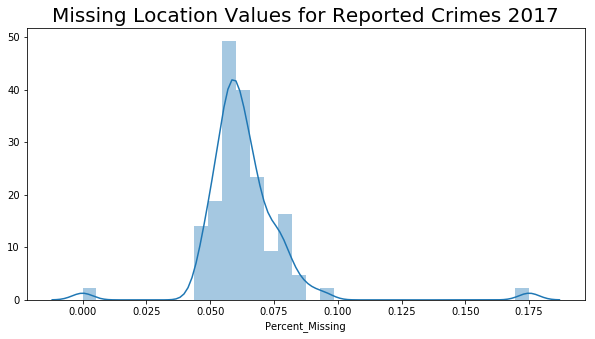

In [75]:
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(missing_loc['Percent_Missing'])
ax.set_title('Missing Location Values for Reported Crimes 2017', size=20)
plt.show();

When we plot the percentage of missing location data for each community area, we see the airport outlier to the right (which makes sense and we don't care about, but there's also an outlier to the left - let's take a look at that one

In [77]:
missing_loc.sort_values('Percent_Missing', ascending=True).head(5)

,Community Area,Location,ID,Percent_Missing
0,0,1,1,0.000000
37,37,836,876,0.045662
66,66,5434,5707,0.047836
13,13,908,954,0.048218
39,39,1437,1510,0.048344


Ok, so Community Area 0 is likely not an area where people live (or presumably go to school) - think forest preserves - and it only has one observation so it's not consequential

Because the rest of the data have a normal distribution of missing location values across all community areas I feel good about only using crime data with associated lat/long points and tossing the rest

### Subset Relevant Columns

In [78]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265740 entries, 0 to 265739
Data columns (total 22 columns):
ID                      265740 non-null int64
Case Number             265740 non-null object
Date                    265740 non-null object
Block                   265740 non-null object
IUCR                    265740 non-null object
Primary Type            265740 non-null object
Description             265740 non-null object
Location Description    264880 non-null object
Arrest                  265740 non-null bool
Domestic                265740 non-null bool
Beat                    265740 non-null int64
District                265740 non-null int64
Ward                    265739 non-null float64
Community Area          265740 non-null int64
FBI Code                265740 non-null object
X Coordinate            249226 non-null float64
Y Coordinate            249226 non-null float64
Year                    265740 non-null int64
Updated On              265740 non-null object
La

In [79]:
crimes_subs = crimes.loc[crimes['Location'].notnull(), ['ID', 
                                                        'Date', 
                                                        'Primary Type', 
                                                        'Arrest', 
                                                        'Community Area',
                                                        'X Coordinate',
                                                        'Y Coordinate',
                                                        'Latitude',
                                                        'Longitude']]

In [81]:
crimes_subs.head()

,ID,Date,Primary Type,Arrest,Community Area,X Coordinate,Y Coordinate,Latitude,Longitude
0,10801165,01/01/2017 01:00:00 AM,BATTERY,True,8,1175950.0,1908370.0,41.903933,-87.629129
1,10801166,01/01/2017 01:23:00 AM,PUBLIC PEACE VIOLATION,True,71,1171453.0,1848804.0,41.740579,-87.647394
2,10801090,01/01/2017 12:01:00 AM,CRIMINAL DAMAGE,False,42,1187984.0,1862596.0,41.778047,-87.586388
3,10801213,01/01/2017 01:00:00 AM,BATTERY,False,30,1158068.0,1888177.0,41.848906,-87.695365
4,10801214,01/01/2017 01:45:00 AM,CRIMINAL DAMAGE,True,5,1162249.0,1928318.0,41.958969,-87.678896


### Visualize Location Data

Now let's make sure these locations make sense

In [82]:
X_test = crimes_subs.loc[:, 'Longitude']
Y_test = crimes_subs.loc[:, 'Latitude']

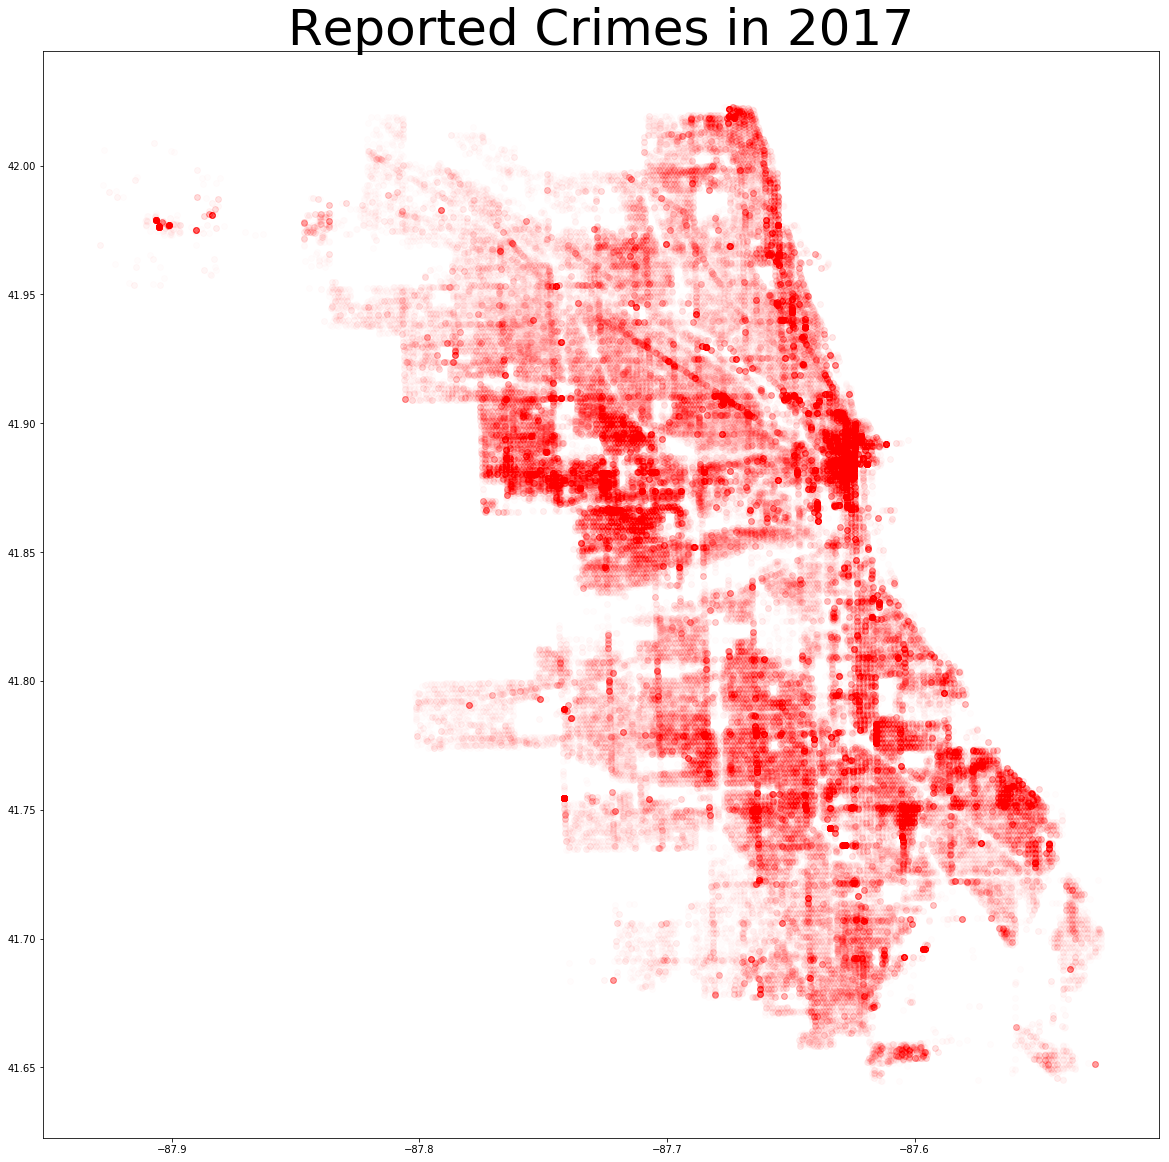

In [87]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_title('Reported Crimes in 2017', size=5### Pickle raw crime data0)

plt.scatter(X_test, Y_test, alpha=0.01, c='r');

## Pickle Raw Crime Data

In [88]:
# Pickle data after cleaning
crimes_subs.to_pickle('../../data/cleaned_crimes.pkl')

# Fetch Budget Data

## Scrape table

### Instantiate Driver Object

In [22]:
# Instantiate a driver object
chromedriver = "/Applications/chromedriver"
os.environ["webdriver.chrome.driver"] = chromedriver

In [23]:
# Opens a Chrome window and goes to google.com
driver = webdriver.Chrome(chromedriver)

### Navigate to URL and Scrape Table

In [24]:
url = 'https://editorial-chi.dnainfo.com/interactives/2016/embed/cpsenrollment/'

In [25]:
# Go to dna info CPA budget page and scrape table
driver.get(url)
time.sleep(3.3);

table_html = driver.find_element_by_xpath('//table[@class="sortable"]').get_attribute('outerHTML')

In [26]:
budget = pd.read_html(table_html)[0]
budget.head()

,School,2016-17,2015-16,Pct. Change,New Budget,Budget Change
0,Chicago Vocational High School,922,978,-5.73%,"$8,316,708","-$235,904"
1,Dunbar High School,563,761,-26.02%,"$6,216,418","-$88,989"
2,Jones High School,1820,1670,8.98%,"$11,061,717","-$231,475"
3,Prosser High School,1381,1455,-5.09%,"$10,986,115","-$156,831"
4,Payton High School,981,887,10.60%,"$6,720,149","-$109,332"


## Pickle Raw Budget Data

In [28]:
budget.to_pickle('../../data/budget_raw.pkl')